# Grouping objects by similarity using k-means

Clustering
(or cluster analysis) is a technique that allows us to find groups of similar
objects, objects that are more related to each other than to objects in other groups. The k-means algorithm belongs to the category of prototype-based clustering.Prototype-based clustering means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the medoid (the most representative or most frequently occurring point) in the case of categorical features

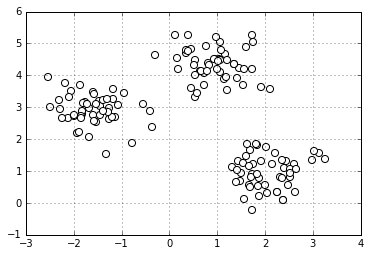

In [16]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], c = 'white', marker = 'o', s = 50)
plt.grid()
plt.show()

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, #number of clusters
            init = 'random', #choose 3 random data points as initial centroids
            n_init = 10, #number of times k-means clustering will be executed with different centroid seeds
            max_iter = 300, #maximum number of iterations of K-means in each iteration
            tol = 0.00001, #relative tolerance to declare convergence
            random_state = 0 #seed for randomness
           )
y_km = km.fit_predict(X)

### K-means++

To use k-means++ with scikit-learn's KMeans object, we just need to set the init parameter to k-means++ (the default setting) instead of random.

When we are applying k-means to real-world data using a Euclidean distance metric, we want to make sure that the features are measured on the same scale and apply z-score standardization or min-max scaling if necessary.

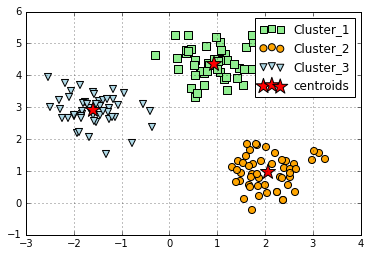

In [18]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, c = 'lightgreen', marker ='s', label = 'Cluster_1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, c = 'orange', marker ='o', label = 'Cluster_2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, c = 'lightblue', marker ='v', label = 'Cluster_3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker ='*', c = 'red',
            label = 'centroids')
plt.legend()
plt.grid()
plt.show()

In [19]:
km.cluster_centers_.shape

(3, 2)

### Hard versus soft clustering

Hard clustering describes a family of algorithms where each sample in a dataset is assigned to exactly one cluster, as in the k-means algorithm.In contrast, algorithms for soft clustering (sometimes also called fuzzy clustering) assign a sample to one or more clusters. A popular example of soft clustering is the fuzzy C-means (FCM) algorithm.

The FCM procedure is very similar to k-means. However, we replace the hard
cluster assignment by probabilities for each point belonging to each cluster.

### Using the elbow method to find the optimal number of clusters

In order to quantify the quality of clustering, we need to use intrinsic metrics—such as the within-cluster SSE (distortion). Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate the optimal number of clusters k for a given task. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly.

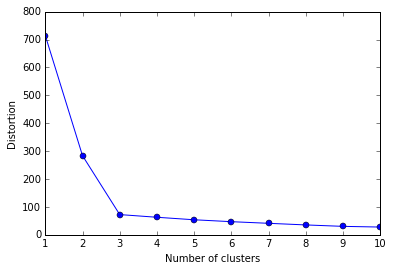

In [20]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Quantifying the quality of clustering via silhouette plots

Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the samples in the clusters are. 
The silhouette coefficient is bounded in the range -1 to 1. Based on the preceding formula, we can see that the silhouette coefficient is 0 if the cluster separation and cohesion are equal. We get close to an ideal silhouette coefficient of 1. 

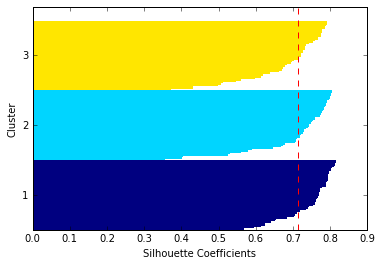

In [21]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.00001, random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, 
            edgecolor = 'none', color = color)
    y_ticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficients')
plt.show()

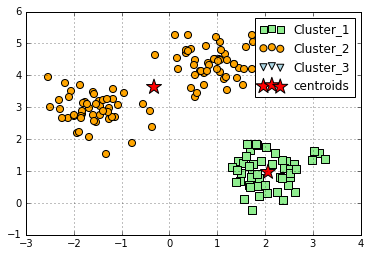

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, #number of clusters
            init = 'k-means++', #choose 3 random data points as initial centroids
            n_init = 10, #number of times k-means clustering will be executed with different centroid seeds
            max_iter = 300, #maximum number of iterations of K-means in each iteration
            tol = 0.00001, #relative tolerance to declare convergence
            random_state = 0 #seed for randomness
           )
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, c = 'lightgreen', marker ='s', label = 'Cluster_1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, c = 'orange', marker ='o', label = 'Cluster_2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, c = 'lightblue', marker ='v', label = 'Cluster_3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker ='*', c = 'red',
            label = 'centroids')
plt.legend()
plt.grid()
plt.show()

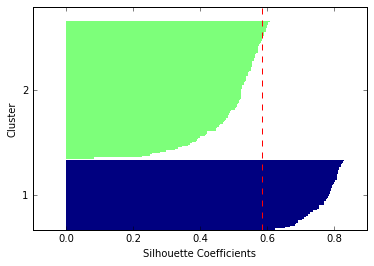

In [23]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')

y_ax_lower, y_ax_upper = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height = 1.0, 
            edgecolor = 'none', color = color)
    y_ticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficients')
plt.show()

# Organizing clusters as a hierarchical tree

The two main approaches to hierarchical clustering are agglomerative and divisive hierarchical clustering. In divisive hierarchical clustering, we start with one cluster that encompasses all our samples, and we iteratively split the cluster into smaller clusters until each cluster only contains one sample. Agglomerative clustering takes the opposite approach. We start with each sample as an individual cluster and merge the closest pairs of clusters until only one cluster remains.

The two standard algorithms for agglomerative hierarchical clustering are single linkage and complete linkage. Using single linkage, we compute the distances between the most similar members for each pair of clusters and merge the two clusters for which the distance between the most similar members is the smallest. The complete linkage approach is similar to single linkage but, instead of comparing the most similar members in each pair of clusters, we compare the most dissimilar members to perform the merge. 

In [24]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


### Performing hierarchical clustering on a distance matrix

In [25]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')), columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [26]:
from scipy.cluster.hierarchy import linkage

#compute row clusters using pdist() method to compute distance matrix
row_clusters = linkage(pdist(df, metric = 'euclidean'), method = 'complete')

#compute row clusters without using pdist() function to compute distance matrix
row_clusters = linkage(df.values, method = 'complete', metric = 'euclidean')

#convert clustering results into a readable panda df
pd.DataFrame(row_clusters, columns = ['row label 1', 'row label 2', 'distance', 'number of items in cluster'], 
            index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,number of items in cluster
cluster 1,0,4,3.835396,2
cluster 2,1,2,4.347073,2
cluster 3,3,5,5.899885,3
cluster 4,6,7,8.316594,5


The first and second columns denote the most dissimilar members in each cluster, and the third row reports the distance between those members.

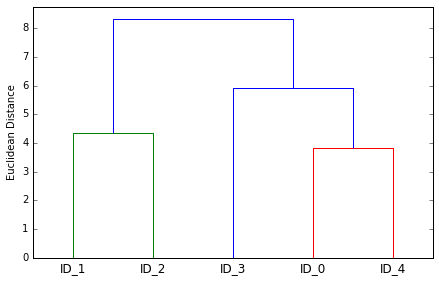

In [27]:
from scipy.cluster.hierarchy import dendrogram
row_dend = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

### Attaching dendrograms to a heat map

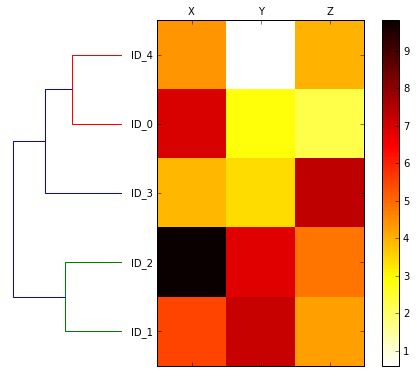

In [28]:
fig = plt.figure(figsize = (8, 8)) #size of dendogram is 8 X 8
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6]) #set x-axis and y-axis positions
row_dendr = dendrogram(row_clusters, orientation = 'right') #rotate dendogram 90 deg counter-clockwise
df_rowclust = df.ix[row_dendr['leaves'][::-1]]#reorder the data in our initial DataFrame according to the cluster labels

#construct heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation = 'nearest', cmap = 'hot_r')

axd.set_xticks([]) #remove any xticks
axd.set_yticks([]) #remove any yticks
for i in axd.spines.values():
    i.set_visible(False) #hide axis spines
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

### Applying agglomerative clustering via scikit-learn

In [29]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
labels = ac.fit_predict(X)
print ('Cluster labels: %s' %labels)

Cluster labels: [0 1 1 0 0]


### Locating regions of high density via DBSCAN

One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to a cluster but is capable of removing noise points.

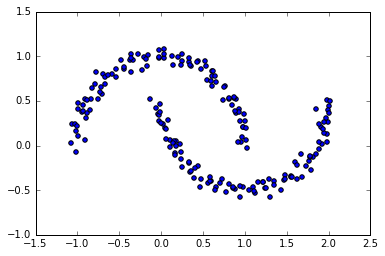

In [30]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

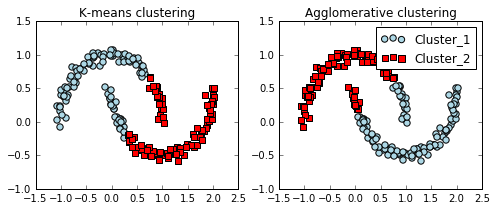

In [33]:
#verify if k-means can separate out the two visible clusters in our data
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters = 2, random_state = 0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1], c = 'lightblue', marker = 'o', s = 40,
           label = 'Cluster_1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1], c = 'red', marker = 's', s = 40,
           label = 'Cluster_2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', 
                             linkage = 'complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c = 'lightblue', marker = 'o', s = 40,
           label = 'Cluster_1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c = 'red', marker = 's', s = 40,
           label = 'Cluster_2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

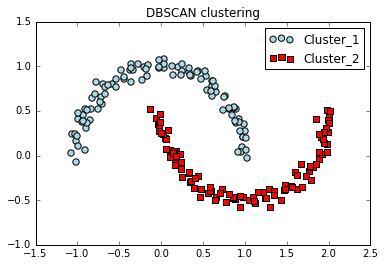

In [36]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c = 'lightblue', marker = 'o', s = 40,
           label = 'Cluster_1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c = 'red', marker = 's', s = 40,
           label = 'Cluster_2')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()

However, we should also note some of the disadvantages of DBSCAN. With an increasing number of features in our dataset—given a fixed size training set—the negative effect of the curse of dimensionality increases. This is especially a problem if we are using the Euclidean distance metric. However, the problem of the curse of dimensionality is not unique to DBSCAN; it also affects other clustering algorithms that use the Euclidean distance metric, for example, the k-means and hierarchical clustering algorithms. In addition, we have two hyperparameters in DBSCAN (MinPts and ) that need to be optimized to yield good clustering results.